In [11]:
"""
A simple example of a batch gradient descent with a learning rate.
"""


'\nA simple example of a batch gradient descent with a learning rate.\n'

In [12]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Define learning rate function

def learning_rate(t,t0=1,t1=100):
    """
    Learning rate function
    #Arguments
    t, int: current learning rate time step which is modelled based on the epoch
    t0, int: baseline learning rate, set to 1 as a default
    t1 int: baseline learning rate to scale, set to 100 as a default
    #Returns
    """
    return t0/(t+t1)

In [14]:
def Gradient(X,ypred,y):
    """
    Gradient function
    
    NOTE Tensorflow has separate functionalities to implement gradient calculation and tracking

    #Arguments

    X, array(int/float): sample values
    y, array(int/float): actual values
    ypred, array(int/float): prediced values

    #Returns
    Jacobian for the gradient with respect to theta
    """
    grad=2*np.dot(X.T,(ypred-y))/len(X) #MSE grad with respect ypred theta
    return grad

[[-0.55626748  1.        ]
 [-0.40571451  1.        ]
 [-0.81388611  1.        ]
 [ 0.01184812  1.        ]
 [ 0.79010795  1.        ]
 [-1.11456409  1.        ]
 [-0.3927262   1.        ]
 [-0.39258019  1.        ]
 [-1.21527597  1.        ]]
[[-46.67763901]
 [-61.65622057]
 [-60.43738849]
 [-41.76825097]
 [ 78.74300954]
 [-58.46613729]
 [-57.90514104]
 [-48.18433229]
 [-89.41700781]]


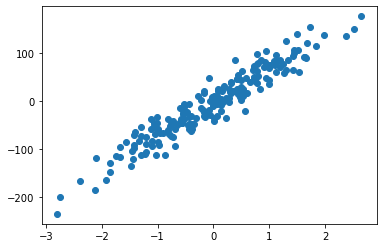

In [16]:
#Generate test data for a simple linear model
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=20)
X=np.c_[X,np.ones((200,1))]
y=y.reshape(200,1)
print(X[1:10])
print(y[1:10])

plt.scatter(X[:,0],y)
plt.show()

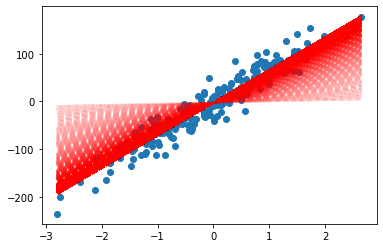

In [20]:
EPOCHS=1000
theta=np.random.randn(2,1) #for a simple linear regression with slope k and b intercept

plt.scatter(X[:,0],y)
thetas=[]
for epoch in range(1,EPOCHS):

    thetas+=[theta]
    #Calculate and update gradient
    ypred=np.dot(X,theta)
    
    grad=Gradient(X,ypred,y)
    lr=learning_rate(epoch)
    theta=theta-grad*lr

    #visualise epoch fitting
    if epoch>0:
        
        yplot=np.dot(X,theta)
        plt.plot(X[:,0],yplot,'--r',alpha=0.2)
plt.show()

Optimal values [[68.40602142]
 [-2.79805612]]


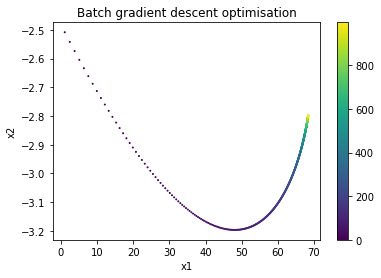

In [21]:
#Explore how batch gradient descent converges
print("Optimal values",theta)

x1,x2=zip(*thetas)

plt.scatter(x1,x2,s=1,c=list(range(len(thetas))))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Batch gradient descent optimisation")
plt.colorbar()
plt.show()